<a href="https://colab.research.google.com/github/hoonzi-s/data_science/blob/master/examples/gekko_18examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GEKKO Python Example Applications

![GEKKO Optimization Suite](http://apmonitor.com/wiki/uploads/Main/gekko_optimization.png)

GEKKO is optimization software for mixed-integer and differential algebraic equations. It is coupled with large-scale solvers for linear, quadratic, nonlinear, and mixed integer programming (LP, QP, NLP, MILP, MINLP). Modes of operation include data reconciliation, real-time optimization, dynamic simulation, and nonlinear predictive control. See the [GEKKO documentation](http://gekko.readthedocs.io/en/latest/overview.html) for additional information.

1. Solver Selection
2. Solve Linear Equations
3. Solve Nonlinear Equations
4. Interpolation with Cubic Spline
5. Linear and Polynomial Regression
6. Nonlinear Regression
7. Machine Learning / Artificial Neural Network
8. Solve Differential Equation(s)
9. Nonlinear Programming Optimization
10. Mixed Integer Nonlinear Programming
11. Optimal Control with Integral Objective
12. Optimal Control with Economic Objective
13. Optimal Control: Minimize Final Time
14. PID Control Tuning
15. Process Simulator
16. Moving Horizon Estimation
17. Model Predictive Control
18. Debugging Resources

In [1]:
try:
    # import gekko if installed
    from gekko import GEKKO
except:
    # install gekko if error on try
    !pip install gekko
    from gekko import GEKKO

# package information
!pip show gekko

# upgrade GEKKO to latest version
# !pip install --upgrade gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.1 MB 7.1 MB/s 
Name: gekko
Version: 1.0.4
Summary: Machine learning and optimization for dynamic systems
Home-page: https://github.com/BYU-PRISM/GEKKO
Author: BYU PRISM Lab
Author-email: john_hedengren@byu.edu
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: 


## 1: Solver selection

Solve $y^2=1$ with APOPT solver. See [APMonitor documentation](https://apmonitor.com/wiki/index.php/Main/OptionApmSolver) or [GEKKO documentation](http://gekko.readthedocs.io/en/latest/global.html?highlight=solver#solver) for additional solver options.

In [20]:
m = GEKKO()           # create GEKKO model
y = m.Var(value=-2)    # define new variable, initial value=2
m.Equation(y**2==1)   # define new equation
m.options.SOLVER=1   # change solver (1=APOPT,3=IPOPT)

m.solve(disp=False)   # solve locally (remote=False)
print('y: ', y.value) # print variable value

y:  [-1.0000000465]


## 2: Solve Linear Equations

$3\,x + 2\,y=1$

$x+2\,y=0$

In [23]:
m = GEKKO()            # create GEKKO model

x, y = m.Array(m.Var, 2)
# z = m.Array(m.Var, (5, 3))

m.Equation(3*x+2*y==1)
m.Equation(x + 2*y == 0)

m.solve(disp=False)    # solve
print(x.value,y.value) # print solution

[0.5] [-0.25]


## 3: Solve Nonlinear Equations

$x+2\,y=0$

$x^2+y^2=1$

In [30]:
m = GEKKO()            # create GEKKO model

x, y = m.Array(m.Var, 2)
x.value = -1
y.value = 1

m.Equation(x + 2*y == 0)
m.Equation(x**2 + y**2 == 1)

m.solve(disp=False)    # solve
print(x.value, y.value) # print solution

[-0.89442719117] [0.44721359558]


## 4: Interpolation with Cubic Spline


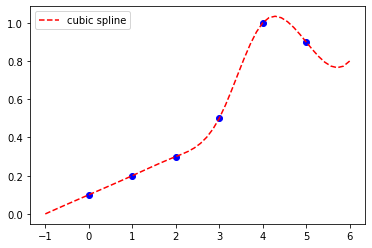

In [34]:
import numpy as np
import matplotlib.pyplot as plt

xm = np.arange(0, 6)
ym = np.array([0.1, 0.2, 0.3, 0.5, 1.0, 0.9])

m = GEKKO()
m.options.IMODE = 2
x = m.Param(value = np.linspace(-1, 6))
y = m.Var()
m.cspline(x, y, xm, ym)
m.solve(disp = False)

plt.plot(xm, ym, 'bo')
plt.plot(x.value, y.value, 'r--', label = 'cubic spline')
plt.legend(loc = 'best')

## 5: Linear and Polynomial Regression

In [ ]:
xm = np.arange(0, 6)
ym = np.array()

## 6: Nonlinear Regression

Optimized a = 0.59599971492


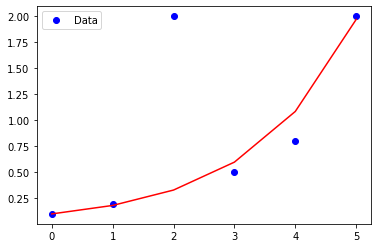

In [48]:
xm = np.arange(0, 6)
ym = np.array([0.1, 0.2, 2, 0.5, 0.8, 2.0])

m = GEKKO()

x = m.Param(value = xm)
y = m.CV(value = ym)
y.FSTATUS = 1

a = m.FV()  # just one value only
a.STATUS = 1

# m.Minimize((y - z) ** 2)

m.Equation(y == 0.1 * m.exp(a * x))

m.options.IMODE = 2
m.options.EV_TYPE = 2
m.solve(disp = False)

print('Optimized a =', a.value[0])

plt.plot(xm, ym, 'bo', label = 'Data')
plt.plot(xm, y.value, 'r-')
plt.legend()
plt.show()

## 7: Machine Learning

Approximate $y = sin(x)$ with an Artificial Neural Network

__Trigonometric Function (select=True)__

* Input: $x$
* Layer 1: linear layer, 1 node, $l1 = w1 \; x$
* Layer 2: nonlinear layer, 1 node, cosine function, $l2 = \cos(w2a+w2b\;l1)$
* Layer 3: linear layer, 1 node, $l3 = w3 \; l2$
* Output: $y = \sum{l3}$

__Artificial Neural Network Description (select=False)__

* Input: $x$
* Layer 1: linear layer, 2 nodes, $l1 = w1 \; x$
* Layer 2: nonlinear layer, 3 nodes, hyperbolic tangent activation function, $l2 = \tanh(w2a+w2b\;l1)$
* Layer 3: linear layer, 2 nodes, $l3 = w3 \; l2$
* Output: $y = \sum{l3}$

See [Online Neural Network Demo](https://playground.tensorflow.org) with TensorFlow.

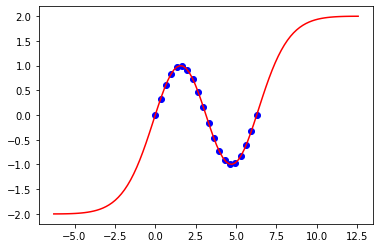

In [50]:
from gekko import brain

# generate training data
x = np.linspace(0.0, 2*np.pi, 20)
y = np.sin(x)

x = np.array(x)
y = np.array(y)

b = brain.Brain()
b.input_layer(1)
b.layer(linear=2)
b.layer(tanh=3)
b.layer(linear=2)
b.output_layer(1)

b.learn(x, y, disp = False) # train
xp = np.linspace(-2*np.pi,4*np.pi,100) 
yp = b.think(xp) # validate

plt.figure()
plt.plot(x,y,'bo')
plt.plot(xp,yp[0],'r-')
plt.show()

## 8: Solve Differential Equation(s)

Solve the following differential equation with initial condition $y(0) = 5$:

$ k \, \frac{dy}{dt} = -y$

where $k=10$. The solution of $y(t)$ should be reported from an initial time $0$ to final time $20$. Create of plot of the result for $y(t)$ versus $t$. 

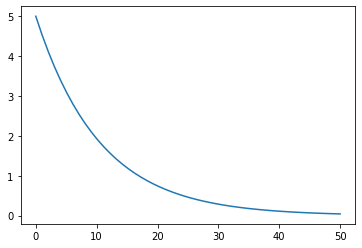

In [53]:
m = GEKKO()
k = 10
y = m.Var(5)
m.time = np.linspace(0, 50)
m.Equation(k * y.dt() + y == 0)
m.options.IMODE = 4
m.solve(disp = False)

plt.plot(m.time, y)

## 9: Nonlinear Programming Optimization

Solve the following nonlinear optimization problem:

$\min x_1 x_4 \left(x_1 + x_2 + x_3\right) + x_3$

$\mathrm{s.t.} \quad x_1 x_2 x_3 x_4 \ge 25$

$x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$

$1\le x_1, x_2, x_3, x_4 \le 5$

with initial conditions:

$x_0 = (1,5,5,1)$


In [63]:
m = GEKKO()

x = m.Array(m.Var, 4, lb = 1, ub = 5, value = 1)
x1, x2, x3, x4 = x
x2.value = 5
x3.value = 5

m.Equation(np.prod(x) >= 25)
m.Equation(np.sum([x[i]**2 for i in range(4)]) == 40)
m.Minimize(x1 * x4 * (x1 + x2 + x3) + x3)
m.options.IMODE = 3
m.solve(disp = False)

print('Results')
print(f'x1: {x1.value[0]}')
print(f'x2: {x2.value[0]}')
print(f'x3: {x3.value[0]}')
print(f'x4: {x4.value[0]}')
print(f'Objective: {m.options.objfcnval}')

Results
x1: 1.000000057
x2: 4.74299963
x3: 3.8211500283
x4: 1.3794081795
Objective: 17.014017127



## 10: Mixed Integer Nonlinear Programming

In [66]:
m = GEKKO()

x = m.Array(m.Var, 4, value = 1, lb = 1, ub = 5, integer = True)
x1, x2, x3, x4 = x
x2.value = 5
x3.value = 5

m.Equation(np.prod(x) >= 25)
m.Equation(np.sum([x[i]**2 for i in range(4)]) == 40)
m.Minimize(x1 * x4 * (x1 + x2 + x3) + x3)
m.options.SOLVER = 1
m.solve(disp = False)

print('Results')
print(f'x1: {x1.value[0]}')
print(f'x2: {x2.value[0]}')
print(f'x3: {x3.value[0]}')
print(f'x4: {x4.value[0]}')
print(f'Objective: {m.options.objfcnval}')

Results
x1: 2.0
x2: 4.0
x3: 4.0
x4: 2.0
Objective: 44.0


## 11: Optimal Control with Integral Objective

__Original Form__

$\min_u \frac{1}{2} \int_0^2 x_1^2(t) \, dt$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$x_1(0) = 1$

$-1 \le u(t) \le 1$

In [72]:
m = GEKKO()
nt = 101
m.time = np.linspace(0, 2, nt)
x1 = m.Var(1)
u = m.Var(0, lb = -1, ub = 1)

m.Equation(x1.dt() == u)
m.Minimize(1/2 * m.integral(x**2))
m.options.IMODE = 6
m.solve()



apm 34.91.64.121_gk_model62 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 @error: Model Expression
 *** Error in syntax of function string: Invalid element: int_v1
 
Position: 3                   
 ((int_v1)^(2))((int_v2)^(2))((int_v3)^(2))((int_v4)^(2))
   ?



Exception: ignored

__Equivalent Form for GEKKO__

$\min_{u(t)} -J\left(t_f\right)$

$\mathrm{subject \; to}$

$\frac{dx}{dt}=r \, x(t) \left(1-\frac{x(t)}{k}\right)-u \, U_{max}$

$\frac{dJ}{dt} = \left(E-\frac{c}{x}\right) u \, U_{max}$

$x(0) = 70$

$J(0) = 0$

$0 \le u(t) \le 1$

$t_f = 10, \, E=1, \, c=17.5$

$r=0.71, \, k=80.5, \, U_{max}=20$

## 12: Optimal Control with Economic Objective

__Original Form__

$\max_{u(t)} \int_0^{10} \left(E-\frac{c}{x}\right) u \, U_{max} \, dt$

$\mathrm{subject \; to}$

$\frac{dx}{dt}=r \, x(t) \left(1-\frac{x(t)}{k}\right)-u \, U_{max}$

$x(0) = 70$

$0 \le u(t) \le 1$

$E=1, \, c=17.5, \, r=0.71$

$k=80.5, \, U_{max}=20$



## 13: Optimal Control: Minimize Final Time

__Original Form__

$\min_{u(t)} \; t_f$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$\frac{dx_2}{dt}=\cos\left(x_1(t)\right)$

$\frac{dx_3}{dt}=\sin\left(x_1(t)\right)$

$x(0) = \left[\pi/2,4,0\right]$

$x_2\left(t_f\right)=0$

$x_3\left(t_f\right)=0$

$-2 \le u(t) \le 2$

__Equivalent Form for GEKKO__

$\min_{u(t), t_f} \; t_f$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=t_f \, u$

$\frac{dx_2}{dt}=t_f \, \cos\left(x_1(t)\right)$

$\frac{dx_3}{dt}=t_f \, \sin\left(x_1(t)\right)$

$x(0) = \left[\pi/2,4,0\right]$

$x_2\left(t_f\right)=0$

$x_3\left(t_f\right)=0$

$-2 \le u(t) \le 2$

## 14: PID Control Tuning

A [PID Controller](https://en.wikipedia.org/wiki/PID_controller) has proportional, integral, and derivative terms to determine the controller output ($OP$) based on the set point ($SP$) and process variable ($PV$). A standard PID form has constants $K_c$, $\tau_I$, and $\tau_D$.


$err = SP-PV$

$OP = OP_0 + K_c \, err + \frac{K_c}{\tau_I} \int err \, dt - K_c \, \tau_D \frac{d\,PV}{dt}$ 

The effect of the tuning constants is shown with the [PID Tuning Notebook](http://nbviewer.jupyter.org/url/apmonitor.com/pdc/uploads/Main/pid_widget.ipynb). This example is an alternative implementation in GEKKO.

## 15: Process Simulator

## 16: Moving Horizon Estimation

Run the Process Simulation cell above to generate the data. The MHE application uses a first order model while the process simulation is a second order system. This is done to emulate a realistic case with model mismatch and measurement noise.

This demonstrates just one cycle of an MHE application. Typical MHE applications receive an additional measurements, re-optimize parameters and states, and re-inject the parameters into a controller. 

## 17: Model Predictive Control

## 18: Debugging Resources

Applications may need a more detailed inspection to find errors in programming syntax, errors in modeling assumptions, or to generate good initial guess values. The GEKKO or the solver solution reports syntax errors. Setting m.solve(disp=True) displays the solver output with a message on the line of code that is unsuccessful. Naming the variables such as name='state' is helpful to display the equations in a readable form.

Other strategies for obtaining a successful solution include:

* Increase the number of iterations with MAX_ITER (0-1000+)
* Increase the diagnostic level with DIAGLEVEL (0-10)
* Change the solver with SOLVER (1-5)
* Calculate model SENSITIVITY (1)
* Solve a square problem with # Variables = # Equations
* Set COLDSTART to initialize problem (0-2)

Additional [modeling](http://apmonitor.com/do/index.php/Main/ModelFormulation), [initialization](http://apmonitor.com/do/index.php/Main/ModelInitialization), and [decomposition](https://www.sciencedirect.com/science/article/pii/S0098135415001179) tips may be helpful. There is also an online [discussion group](http://apmonitor.com/wiki/index.php/Main/UsersGroup), [video playlist](https://www.youtube.com/playlist?list=PLLBUgWXdTBDjcqDl2e5F_hcBjEc6vjr1X), [GEKKO documentation](http://gekko.readthedocs.io/en/latest/), and [APMonitor documentation](http://apmonitor.com/wiki/index.php/Main/HomePage) as additional resources.